<a href="https://colab.research.google.com/github/karl0212/PyNite/blob/master/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tensorflow-gpu==2.0.0-beta1

     |████████████████████████████████| 348.9MB 60kB/s 
     |████████████████████████████████| 3.1MB 38.6MB/s 
     |████████████████████████████████| 501kB 47.8MB/s 


In [16]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [17]:
tf.__version__

'2.8.2'

In [ ]:
%load_ext tensorboard

In [ ]:
logdir='log'

In [18]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images, 
            y=train_labels, 
            epochs=5, 
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1454 - accuracy: 0.9547 - val_loss: 0.0459 - val_accuracy: 0.9848
Epoch 2/5
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0482 - accuracy: 0.9856 - val_loss: 0.0362 - val_accuracy: 0.9880
Epoch 3/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0338 - accuracy: 0.9898 - val_loss: 0.0337 - val_accuracy: 0.9883
Epoch 4/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0258 - accuracy: 0.9917 - val_loss: 0.0406 - val_accuracy: 0.9879
Epoch 5/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0199 - accuracy: 0.9933 - val_loss: 0.0342 - val_accuracy: 0.9902


In [22]:
y_true=test_labels
y_pred=model.predict(test_images)


In [46]:

print (y_true)
print (np.shape(y_true))
print (y_pred)
print (np.shape(y_pred))


[7 2 1 ... 4 5 6]
(10000,)
[[6.8368956e-12 4.1072248e-08 8.4922434e-09 ... 9.9999952e-01
  1.0603410e-09 5.1815056e-07]
 [4.6557393e-08 8.3998302e-08 9.9999976e-01 ... 3.4212749e-10
  2.3928455e-09 4.0716633e-13]
 [3.6761362e-06 9.9993682e-01 6.3923085e-06 ... 2.4749920e-06
  5.9152858e-06 2.3711740e-07]
 ...
 [1.2083204e-16 7.7106876e-13 3.5510844e-13 ... 1.4456003e-11
  7.5084682e-11 2.0229670e-11]
 [4.1525021e-12 3.0119306e-14 1.3873147e-14 ... 1.2156991e-16
  4.0218779e-06 5.6484700e-10]
 [9.7114298e-07 1.2047230e-08 9.3720104e-07 ... 1.4260370e-12
  7.3163696e-06 4.2590212e-10]]
(10000, 10)


[[ 970    0    1    0    0    2    3    1    3    0]
 [   1 1128    3    1    0    0    1    0    0    1]
 [   0    1 1024    1    0    0    0    5    1    0]
 [   0    0    1 1003    0    2    0    3    1    0]
 [   0    0    1    0  979    0    1    0    0    1]
 [   1    0    1    6    0  882    1    0    0    1]
 [   2    2    1    0    1    9  938    0    5    0]
 [   0    3    1    0    0    0    0 1017    0    7]
 [   0    0    0    1    0    1    0    2  967    3]
 [   1    1    0    0    8    4    0    0    1  994]]


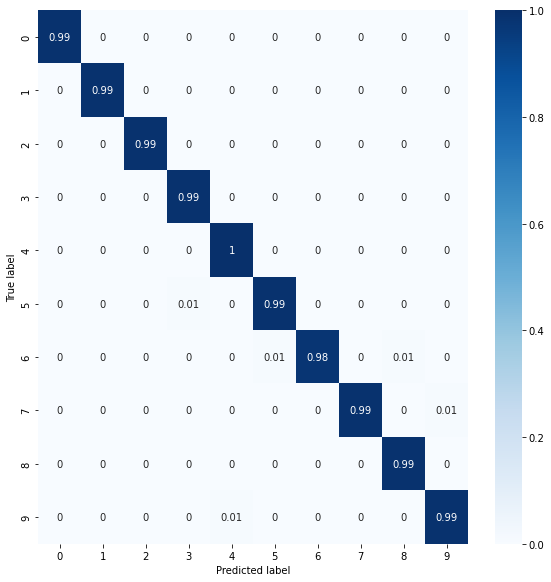

In [49]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=np.argmax(y_pred, axis=1)).numpy()

print (con_mat)
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
file_writer = tf.summary.create_file_writer(logdir + '/cm')

def log_confusion_matrix(epoch, logs):
  # Use the model to predict the values from the validation dataset.
  test_pred = model1.predict_classes(test_images)

  con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=test_pred).numpy()
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

  con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

  figure = plt.figure(figsize=(8, 8))
  sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  
  buf = io.BytesIO()
  plt.savefig(buf, format='png')

  plt.close(figure)
  buf.seek(0)
  image = tf.image.decode_png(buf.getvalue(), channels=4)

  image = tf.expand_dims(image, 0)
  
  # Log the confusion matrix as an image summary.
  with file_writer.as_default():
    tf.summary.image("Confusion Matrix", image, step=epoch)

    
logdir='logs/images'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [ ]:
model1.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=0, 
    callbacks=[tensorboard_callback, cm_callback],
    validation_data=(test_images, test_labels),
)

In [ ]:
# Start TensorBoard.
%tensorboard --logdir logs/images